<h1>Time Series</h1>

<h2>The objective of this notebook is: </h2>
<ol>
<li>In the first part: understand Time series forecasting with ARIMA model in python, and fine tune the hyper-parameters to get the least possible error.</li>
<li> In the second part: Apply CNN from scratch to the same dataset.</li>
<li> Apply Facebook prophet to the same dataset.</li>
</ol>

<h2>The dataset</h2>

Build a model to forecast the demand (passenger traffic) in Airplanes.<br> 
The data is classified in date/time and the passengers travelling per month

<h2>What is Time series analysis?</h2>

A. Time Series is a series of observations taken at specified time intervals usually equal intervals. <br>
 

<h2>We don't need to apply Time series in atleast the following 2 cases:</h2>
<ul>
<li> 
a) The dependant variable(y) (that is supposed to vary with time) is constant.<br>
    Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.</li> 
<li> b) The dependant variable(y) represent values that can be denoted as a mathematical function.<br> Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself. No need of forecasting.</li> 
    </ul>

<h2>There are 4 componentsof Time Series:</h2>
<ul>
<li>
a) Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.</li>
<li>b) Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only</li>
<li>c) Noise or Irregularity - Spikes & troughs at random intervals</li>
<li>d) Cyclicity - behavior that repeats itself after large interval of time, like months, years etc.</li>
</ul>

<h2>Why does Time Series(TS) need to be stationary?</h2>
<h3>It is because of the following reasons:</h3>
<ul>
<li>a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.</li>
<li>b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.</li>
</ul>

<h2>Tests to check if a series is stationary or not</h2>
<h3> There are 2 ways to check for Stationarity of a TS:</h3>
<ul>
 <li>a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.</li>
<li>b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.</li>
     </ul>

<h1>ARIMA(Auto Regressive Integrated Moving Average)</h1>

<b>ARIMA </b>is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). <br>
<h3>It has 3 hyperparameters -</h3>
<ul>
<li>P (auto regressive lags),</li>
<li>d (order of differentiation),</li>
<li>Q (moving avg.) which respectively comes from the AR, I & MA components.</li>
    </ul>
The AR part is correlation between prev & current time periods. <br>To smooth out the noise, the MA part is used. <br>The I part binds together the AR & MA parts.


<h1>The general steps to implement an ARIMA model are:</h1>
<ol>
   <li>
Load the data: The first step for model building is of course to load the dataset.
    </li>
   <li> 
Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.
   </li>
 <li>    
Make series stationary: In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations.
      </li>
  <li>
Determine d value: For making the series stationary, the number of times the difference operation was performed will be taken as the d value.
     </li>
   <li>
Create ACF and PACF plots: This is the most important step in ARIMA implementation. ACF PACF plots are used to determine the input parameters for our ARIMA model.
     </li>
     <li>
Determine the p and q values: Read the values of p and q from the plots in the previous step.
       </li>
     <li>
Fit ARIMA model: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model.
       </li>
     <li>
Predict values on validation set: Predict the future values
          </li>
     <li>
Calculate RMSE: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set.
      </li>
</ol>

# Tuning Parameters_ Auto ARIMA

Although ARIMA is a very powerful model for forecasting time series data, the data preparation and parameter tuning processes end up being really time consuming. Before implementing ARIMA, you need to make the series stationary, and determine the values of p and q using the plots we discussed above. 
Auto ARIMA makes this task really simple for us as it eliminates steps 3 to 6 we saw in the previous section. Below are the steps you should follow for implementing auto ARIMA:
<ol>
<li>
Load the data: This step will be the same. Load the data into your notebook.
</li>
<li>
Preprocessing data: The input should be univariate, hence drop the other columns.
</li>
<li>    
Fit Auto ARIMA: Fit the model on the univariate series.
</li>
<li>
Predict values on validation set: Make predictions on the validation set.
</li>
<li>
Calculate RMSE: Check the performance of the model using the predicted values against the actual values.
</li>
</ol>


# Time Series with ARIMA

## 1- Load the data

### Importing all the required libraries for analysis

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import numpy as np
import random
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
# prophet by Facebook
# from fbprophet import Prophet
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

### Reading the dataset 
 Creating the 'Date' as Index for data and viewing the dataset

In [98]:
path = "../Data/AirPassengers.csv" 
df = pd.read_csv(path,parse_dates=[0])

## 2- Preprocessing

### convert from string to datetime

In [99]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
df = df.set_index(['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualizing the Time Series plot for the number of Air Passengers

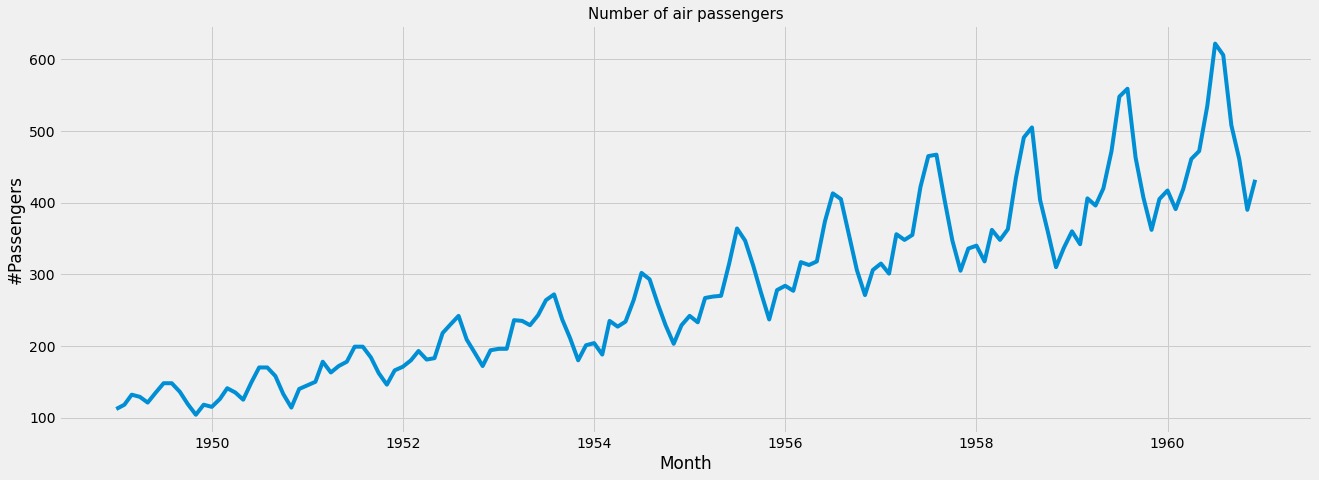

In [24]:
## Plot the Time series data
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Month", y="#Passengers", data=df)
a.set_title("Number of air passengers",fontsize=15)
plt.show()

As we know, A stationary Time Series is one which characteristics like mean and variance does not change over time.<br>
Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

## 3- Make series stationary

In [25]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


### Plotting the Rolling Mean and Standard Deviation, which has window of 12

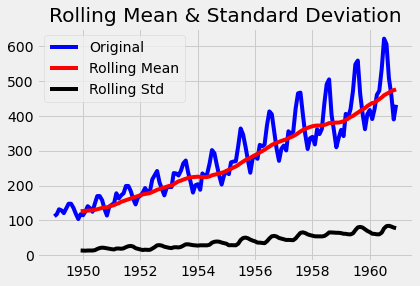

In [26]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### By looking above plot, we conclude that, it is non-stationary bcoz mean and variance is not constant.

### Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
### ADF has : Null hypothesis - Time Series is non-stationary

In [33]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

# Take log transformation to make our Time series stationary

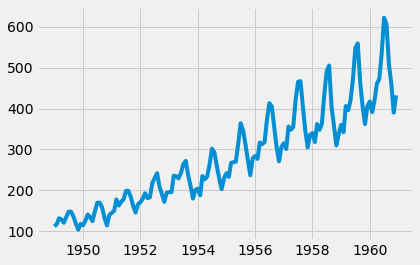

In [27]:
#Estimating trend
df_logScale = np.log(df)
plt.plot(df)

We found graph upward trending over time with seasonality

# Testing Rolling Mean with window 12 on above log transformation 

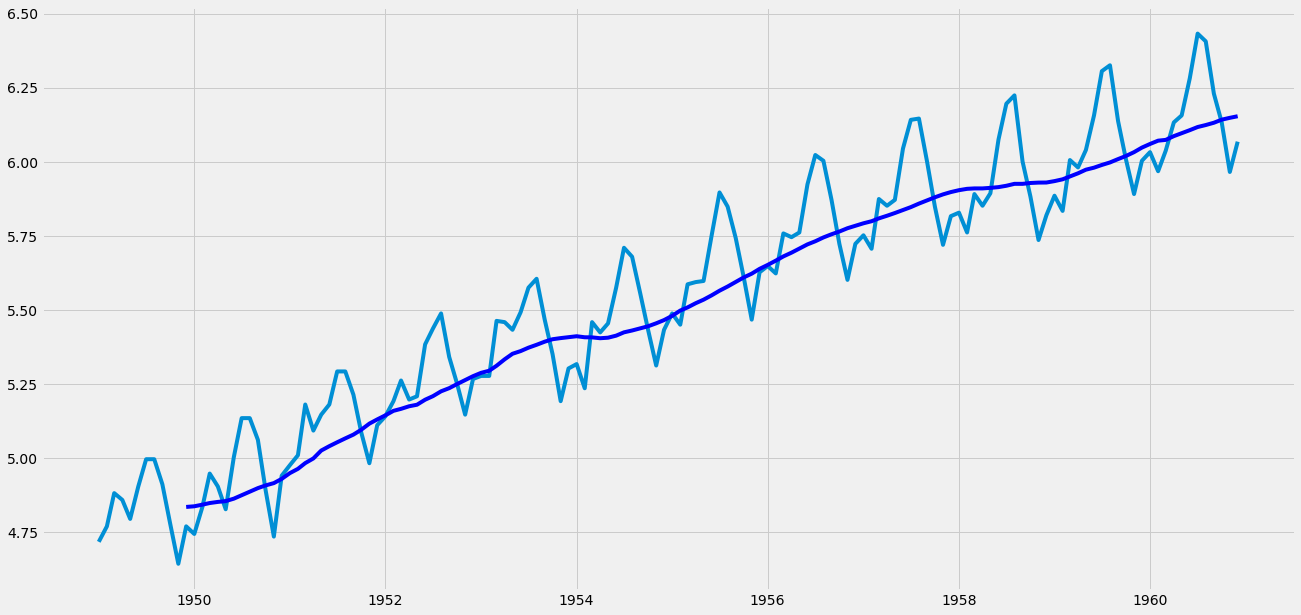

In [32]:
plt.figure(figsize=(20,10))
MAvg=df_logScale.rolling(window=12).mean()
MStd=df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(MAvg, color='blue')

Non-stationary, again

# Using another method differencing, to make our time series stationary


In [54]:
datasetLogDiffShifting = df_logScale - MAvg
datasetLogDiffShifting.head(20)


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [55]:
datasetLogDiffShifting.dropna(inplace=True)

# Defining function for Rolling Mean and Standard Deviation & ADF test

In [56]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

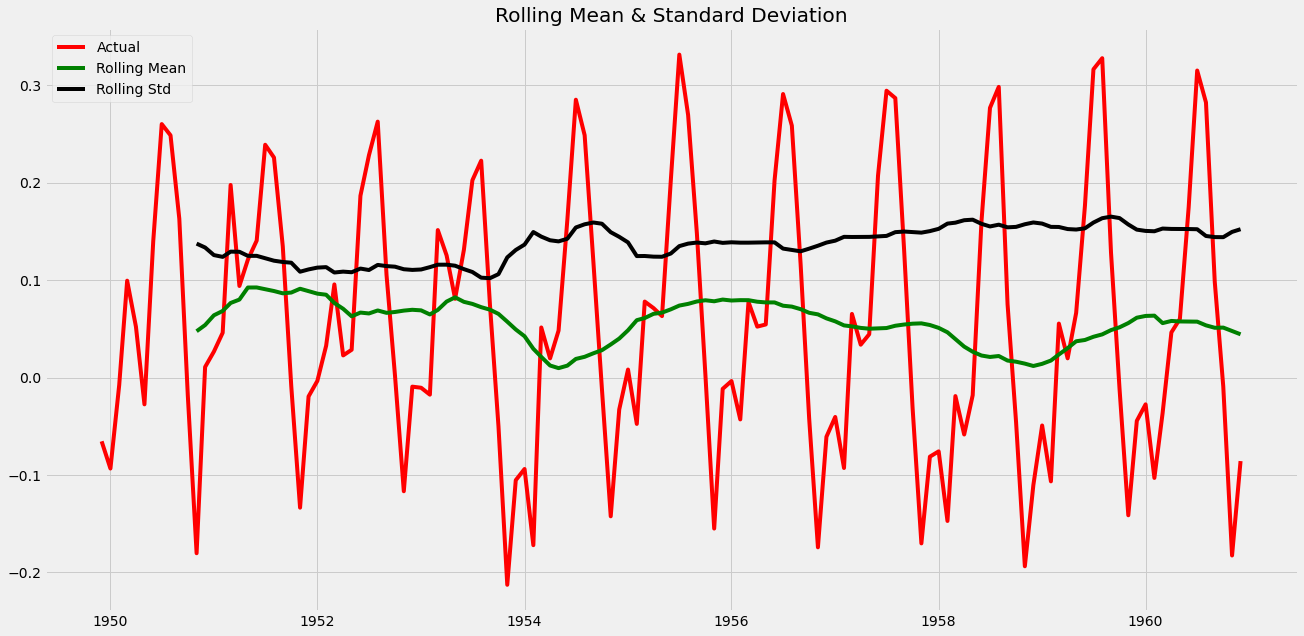

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [57]:
stationarity(datasetLogDiffShifting)

# Checking for Trend stationarity and performing exponential transformation on our data


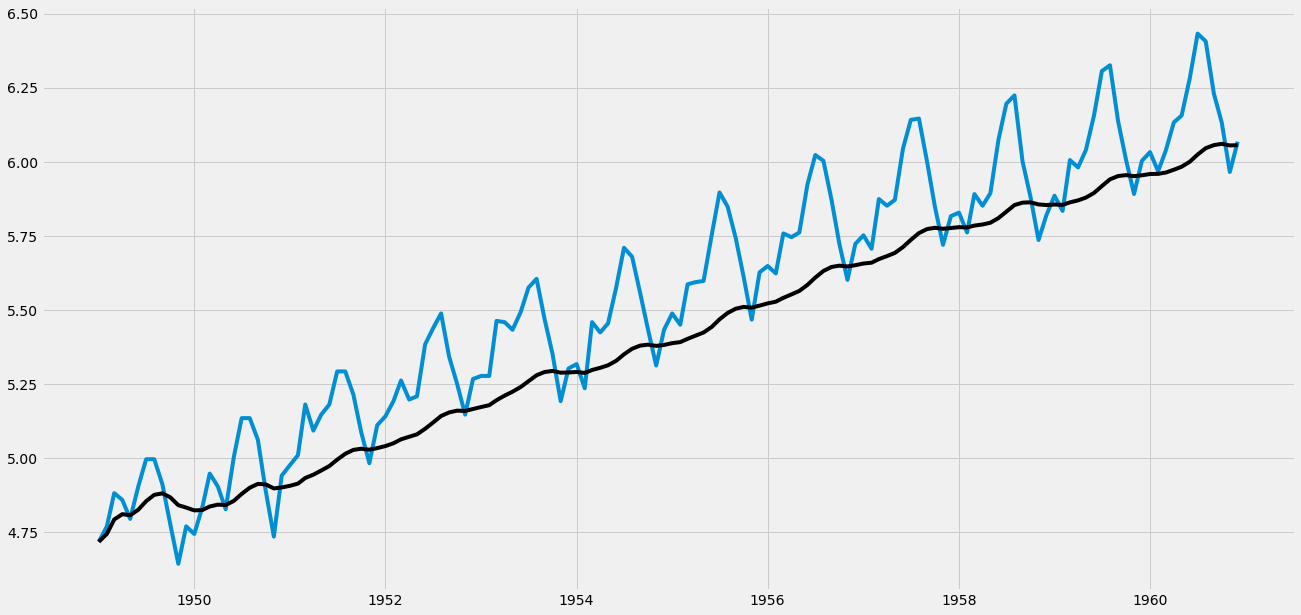

In [60]:
plt.figure(figsize=(20,10))
exp_data=df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exp_data, color='black')

Since log transformation is non-stationary, applying differencing on our data.


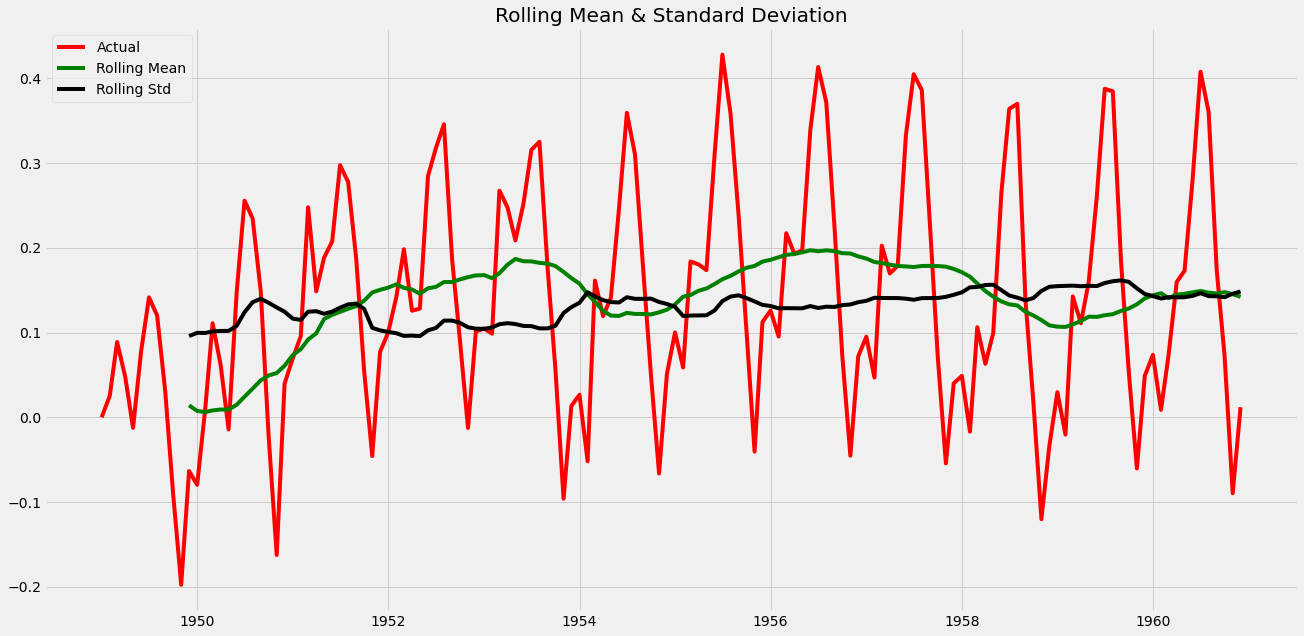

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [62]:
exp_data_diff=df_logScale-exp_data
stationarity(exp_data_diff)

From above graph and ADF test, we conclude, it is trend stationary


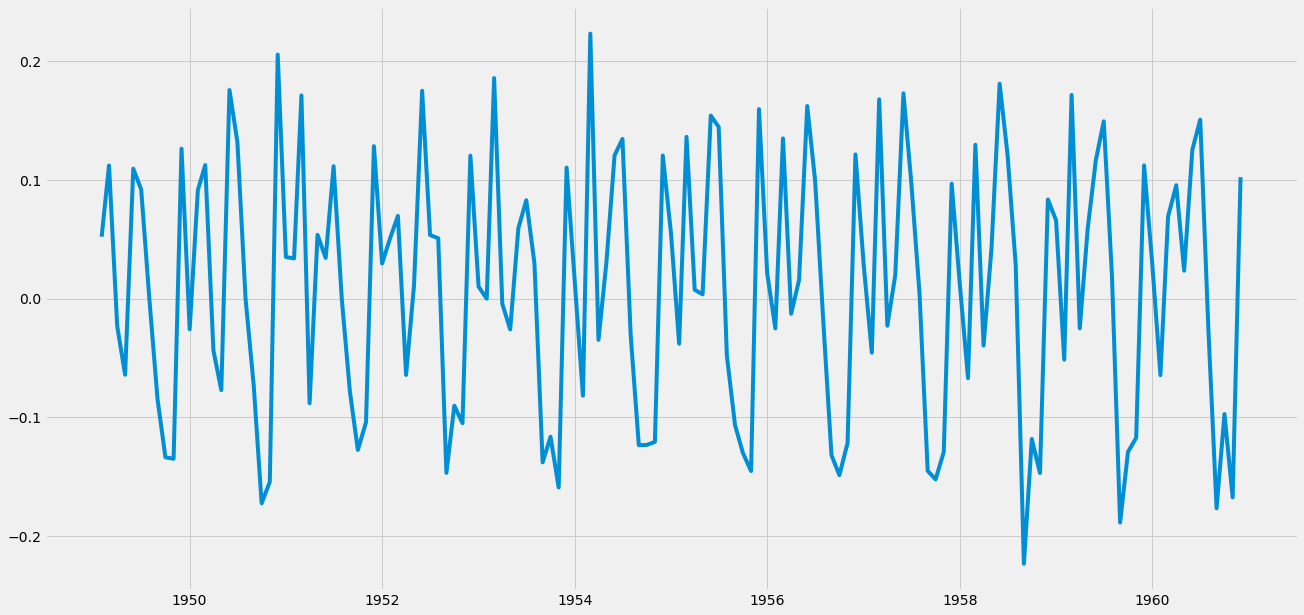

In [64]:
plt.figure(figsize=(20,10))
data_shift=df_logScale-df_logScale.shift()
plt.plot(data_shift)

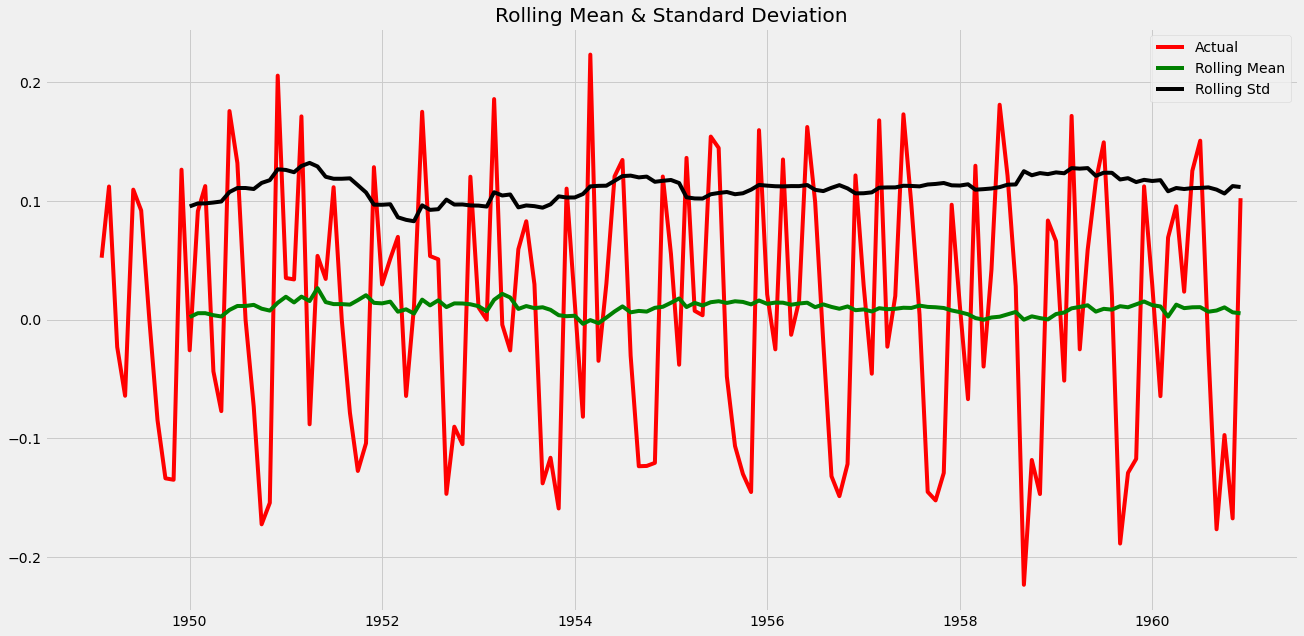

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [65]:
data_shift=data_shift.dropna()
stationarity(data_shift)

### Decomposing Time Series into its components : Trend, Seasonality and Residual

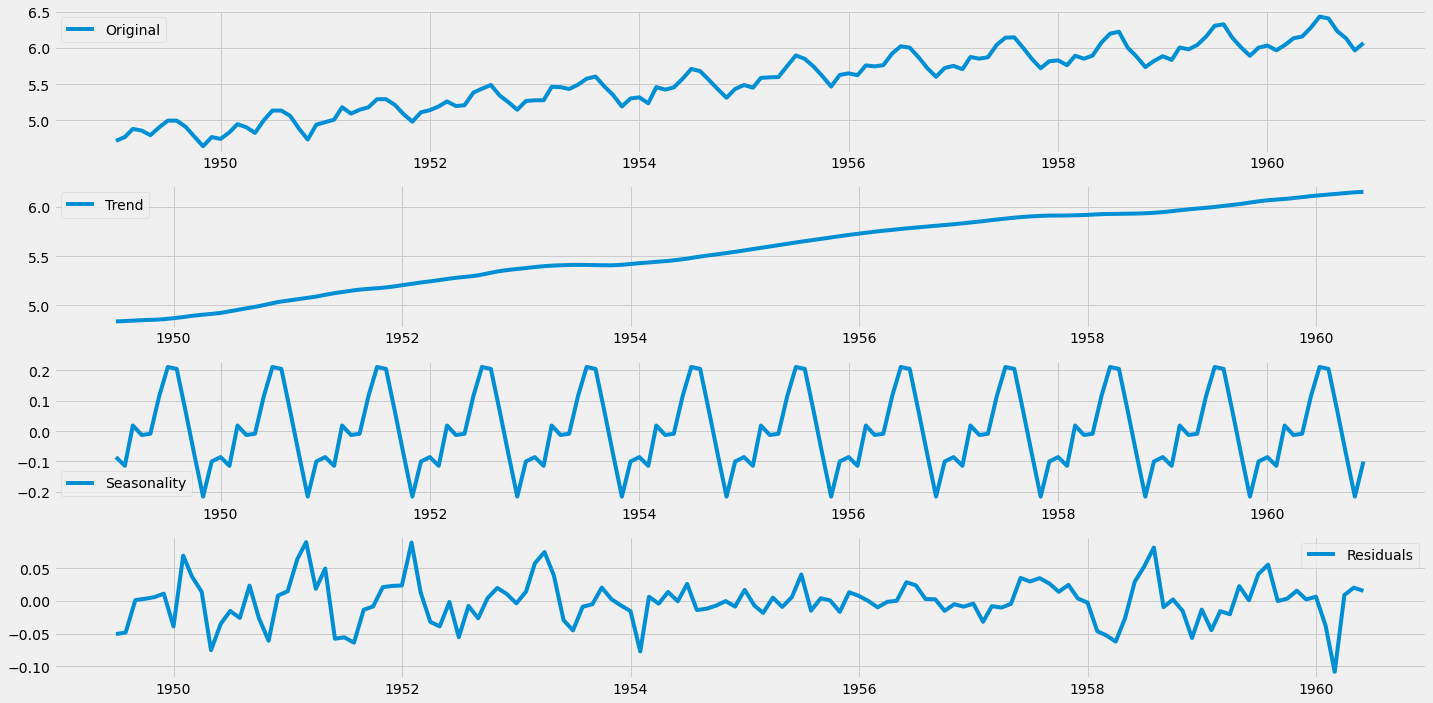

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df_logScale)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Checking the stationarity of Time Series components


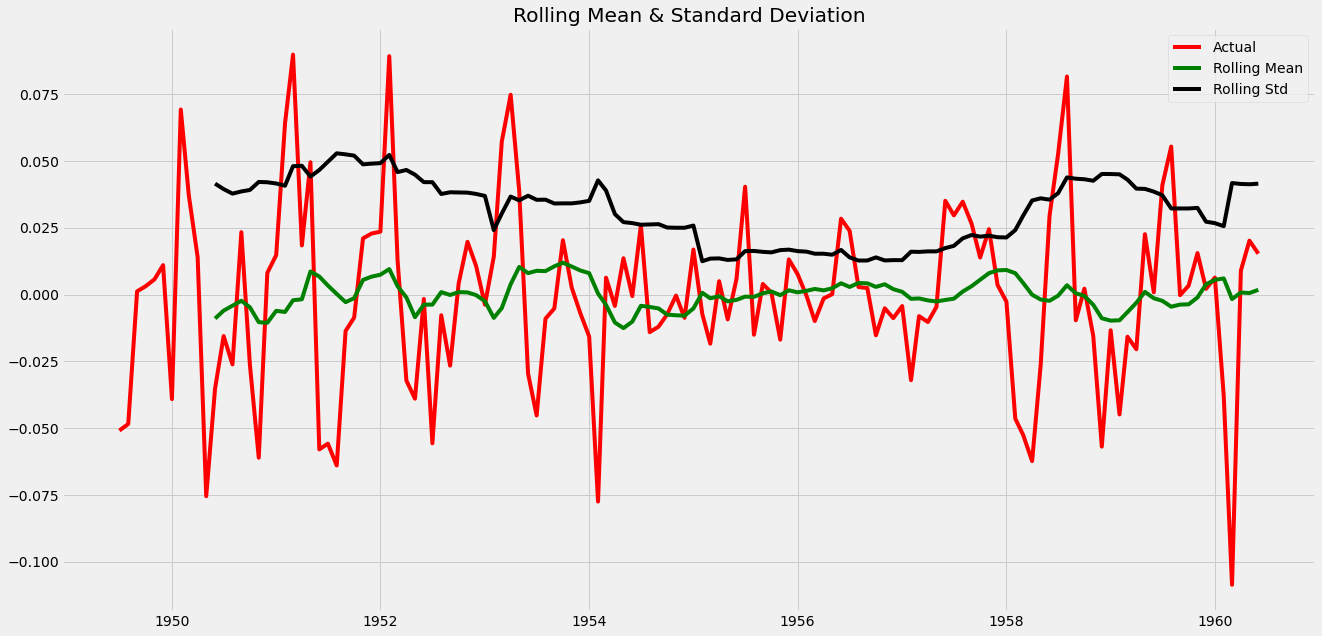

Dickey-Fuller Test: 


KeyError: '#Passengers'

In [104]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

### Plotting the ACF and PACF to find q and p value


Text(0.5, 1.0, 'Partial Autocorrelation Function')

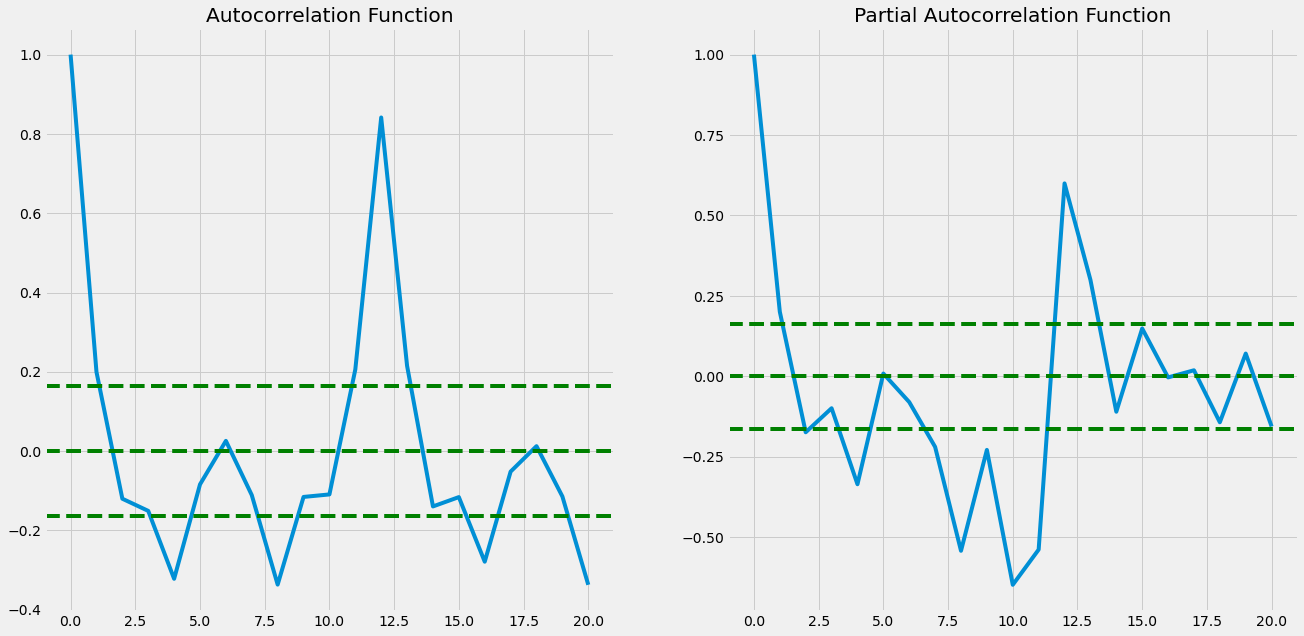

In [105]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

We got q and p both 2 from the graph

# ARIMA model

plotting ARIMA model


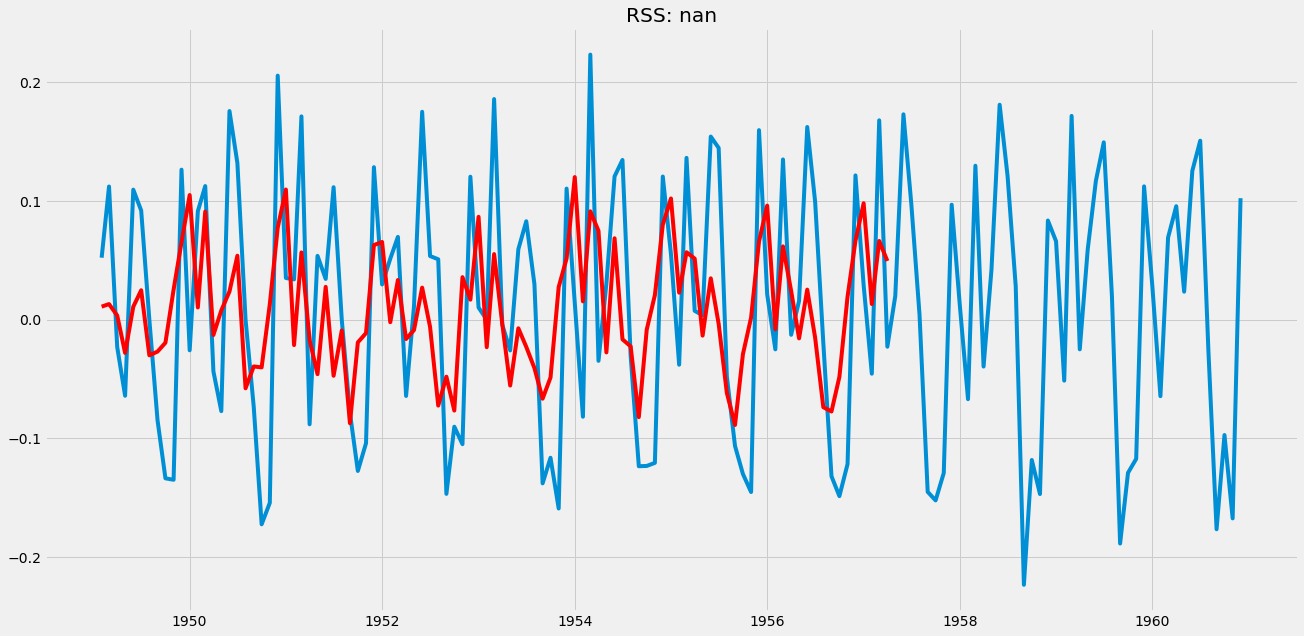

In [123]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(train, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['#Passengers'])**2))
print('plotting ARIMA model')

### Predicted values from ARIMA model in difference form

In [109]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


### Performing Inverse Transformation for differencing, by doing cumulative sum

In [ ]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

### Below is data display of predicted value in log scale

In [114]:
predictions_log=pd.Series(df_logScale['#Passengers'][0], index=df_logScale.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

### Taking out log transformation and visualizing actual vs predicted value graph



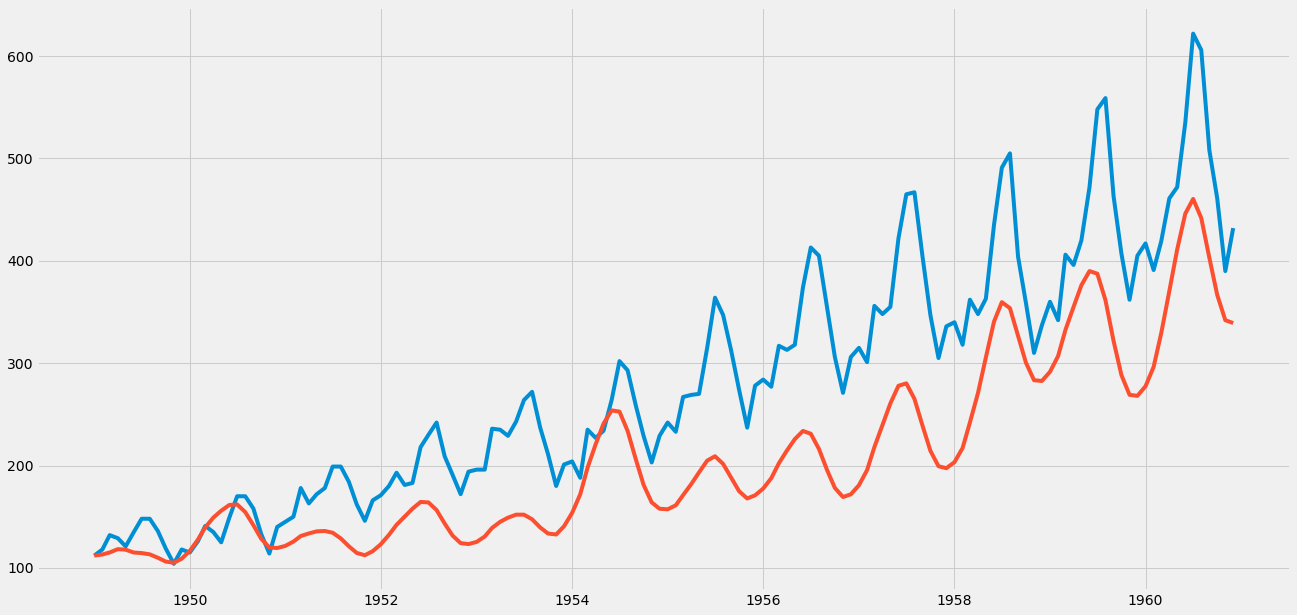

In [116]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.plot(predictions_ARIMA)

### Plotting the visual for forecast of next 10 years with 95% confidence interval

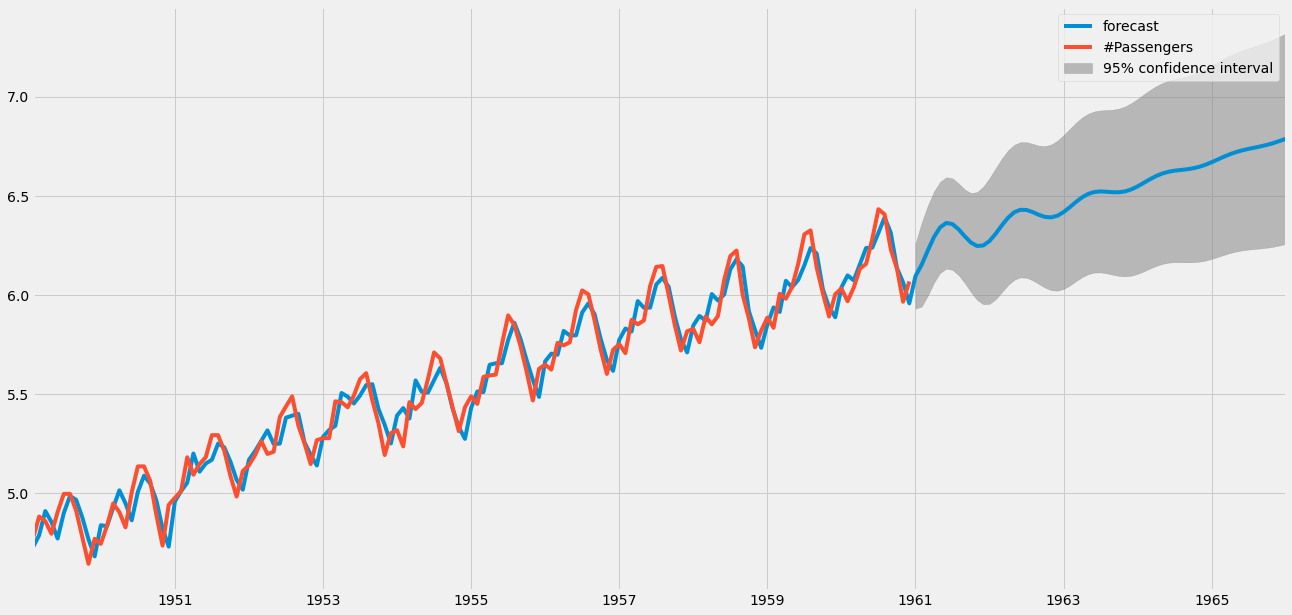

In [118]:
plt.rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

### Next 10 years predicted value on log scale


In [119]:
x[0]

array([6.09553394, 6.15281405, 6.22442968, 6.29241102, 6.34164717,
       6.36359362, 6.35784688, 6.33139308, 6.29597546, 6.2644772 ,
       6.24738332, 6.25025176, 6.27275838, 6.30940311, 6.35151491,
       6.38988652, 6.4172738 , 6.43011055, 6.42906693, 6.41842496,
       6.40456163, 6.39403624, 6.3918309 , 6.40019508, 6.41833694,
       6.44295407, 6.46937434, 6.49293985, 6.5102412 , 6.51989036,
       6.52267584, 6.52112395, 6.51864535, 6.51853698, 6.52311929,
       6.53322365, 6.54812873, 6.56591559, 6.5841031 , 6.60036542,
       6.6131327 , 6.62192786, 6.62737795, 6.63093136, 6.63438697,
       6.63937993, 6.64696512, 6.65739847, 6.6701533 , 6.68414255,
       6.6980663 , 6.71077906, 6.72157737, 6.7303399 , 6.73749818,
       6.74386387, 6.75037331, 6.75782601, 6.7666869 , 6.7769983 ,
       6.78841326, 6.8003286 , 6.81207201, 6.82308766, 6.83307143,
       6.842025  , 6.85022321, 6.8581123 , 6.86617349, 6.8747916 ,
       6.88416311, 6.89426392, 6.90487897, 6.91567946, 6.92632

### Actual predicted value for next 10 years, after taking out log transformation

In [120]:
np.exp(x[0])

array([ 443.87098337,  470.03824071,  504.9349853 ,  540.45480899,
        567.73069   ,  580.32809508,  577.00266039,  561.93887531,
        542.38466264,  525.56675039,  516.65912297,  518.14325664,
        529.93713117,  549.71673143,  573.36063887,  595.78896791,
        612.33149572,  620.24251144,  619.59555355,  613.03679303,
        604.59670471,  598.26645927,  596.94852985,  601.96245481,
        612.98283826,  628.25998635,  645.08000048,  660.46217145,
        671.98847925,  678.50399331,  680.39658549,  679.34149974,
        677.65977205,  677.58633453,  680.69837525,  687.61126266,
        697.93692037,  710.462092  ,  723.50184834,  735.36385444,
        744.81263874,  751.39227998,  755.49861726,  758.187991  ,
        760.81252289,  764.62072572,  770.4425704 ,  778.52294774,
        788.51647226,  799.62474877,  810.83639739,  821.21015849,
        830.12589833,  837.4318626 ,  843.4479405 ,  848.83419015,
        854.37765377,  860.76885672,  868.42992618,  877.43098

# Auto ARIMA

In [86]:
!pip install pmdarima

  Using cached pmdarima-1.8.3-cp38-cp38-win_amd64.whl (600 kB)
  Using cached statsmodels-0.12.2-cp38-none-win_amd64.whl (9.4 MB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'D:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [94]:
#divide into train and validation set
train = df_logScale[:int(0.7*(len(df_logScale)))]
valid = df_logScale[int(0.7*(len(df_logScale))):]

In [95]:
from pmdarima import auto_arima
plt.figure(figsize=(20,10))
model=auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
results=model.fit(train)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-185.097, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-165.683, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-165.650, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-166.640, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-166.459, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-187.062, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-187.605, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-165.514, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-174.055, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-167.161, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-176.055, Time=0.43 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-188.746, Time=0.74 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-

<Figure size 1440x720 with 0 Axes>

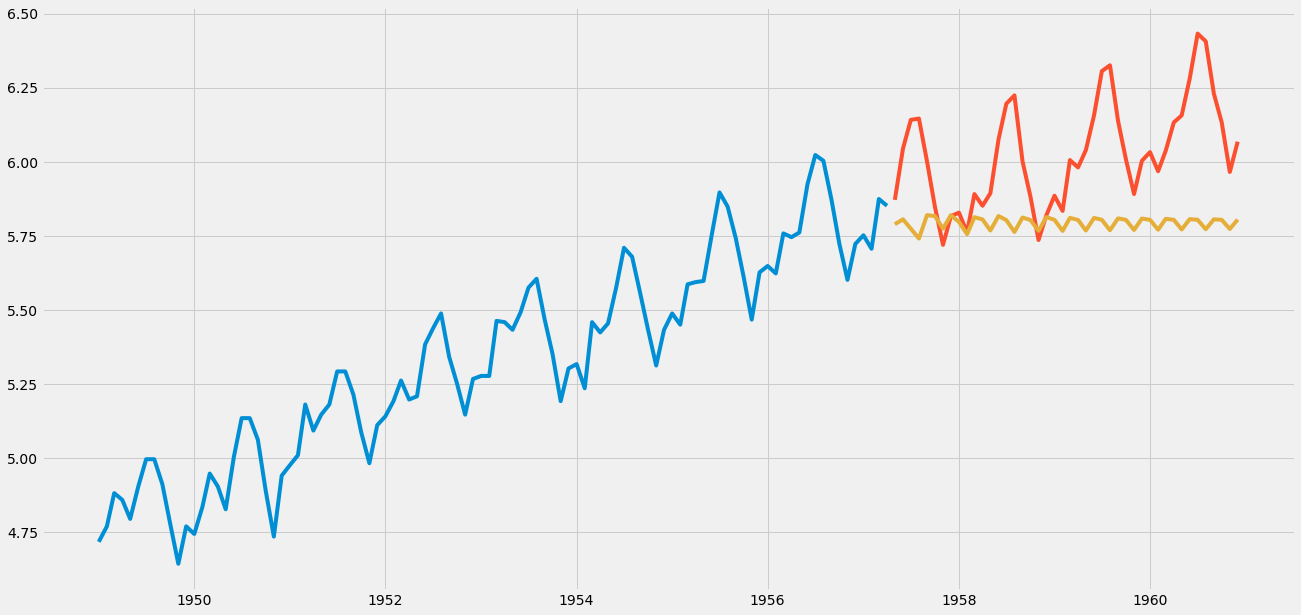

In [96]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [97]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

0.2920365681940234


In [70]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [75]:
predictions_log=pd.Series(df_logScale['#Passengers'][0], index=df_logScale.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

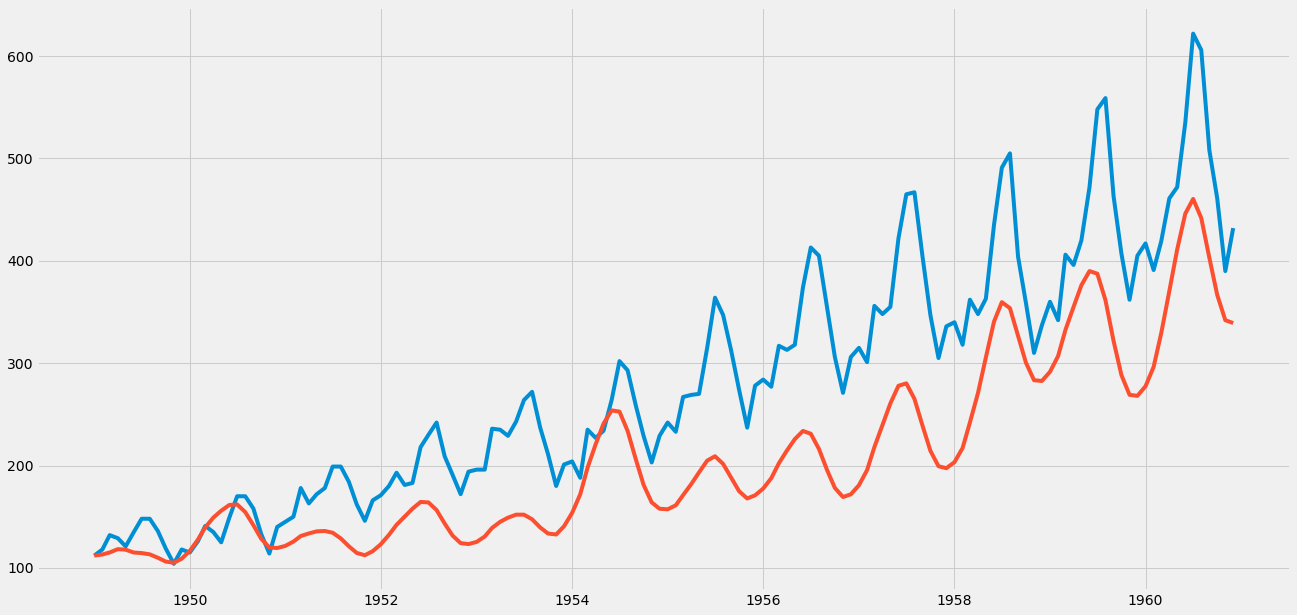

In [77]:

predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.plot(predictions_ARIMA)

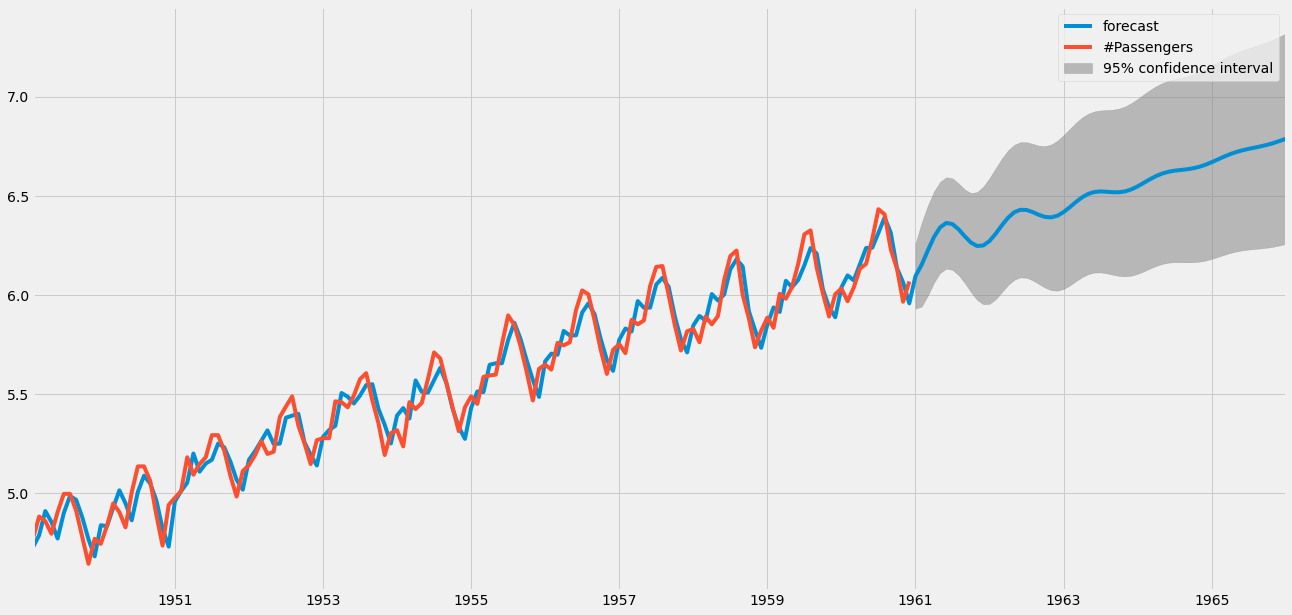

In [79]:
plt.rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [80]:
x[0]

array([6.09553394, 6.15281405, 6.22442968, 6.29241102, 6.34164717,
       6.36359362, 6.35784688, 6.33139308, 6.29597546, 6.2644772 ,
       6.24738332, 6.25025176, 6.27275838, 6.30940311, 6.35151491,
       6.38988652, 6.4172738 , 6.43011055, 6.42906693, 6.41842496,
       6.40456163, 6.39403624, 6.3918309 , 6.40019508, 6.41833694,
       6.44295407, 6.46937434, 6.49293985, 6.5102412 , 6.51989036,
       6.52267584, 6.52112395, 6.51864535, 6.51853698, 6.52311929,
       6.53322365, 6.54812873, 6.56591559, 6.5841031 , 6.60036542,
       6.6131327 , 6.62192786, 6.62737795, 6.63093136, 6.63438697,
       6.63937993, 6.64696512, 6.65739847, 6.6701533 , 6.68414255,
       6.6980663 , 6.71077906, 6.72157737, 6.7303399 , 6.73749818,
       6.74386387, 6.75037331, 6.75782601, 6.7666869 , 6.7769983 ,
       6.78841326, 6.8003286 , 6.81207201, 6.82308766, 6.83307143,
       6.842025  , 6.85022321, 6.8581123 , 6.86617349, 6.8747916 ,
       6.88416311, 6.89426392, 6.90487897, 6.91567946, 6.92632

In [81]:
np.exp(x[0])

array([ 443.87098337,  470.03824071,  504.9349853 ,  540.45480899,
        567.73069   ,  580.32809508,  577.00266039,  561.93887531,
        542.38466264,  525.56675039,  516.65912297,  518.14325664,
        529.93713117,  549.71673143,  573.36063887,  595.78896791,
        612.33149572,  620.24251144,  619.59555355,  613.03679303,
        604.59670471,  598.26645927,  596.94852985,  601.96245481,
        612.98283826,  628.25998635,  645.08000048,  660.46217145,
        671.98847925,  678.50399331,  680.39658549,  679.34149974,
        677.65977205,  677.58633453,  680.69837525,  687.61126266,
        697.93692037,  710.462092  ,  723.50184834,  735.36385444,
        744.81263874,  751.39227998,  755.49861726,  758.187991  ,
        760.81252289,  764.62072572,  770.4425704 ,  778.52294774,
        788.51647226,  799.62474877,  810.83639739,  821.21015849,
        830.12589833,  837.4318626 ,  843.4479405 ,  848.83419015,
        854.37765377,  860.76885672,  868.42992618,  877.43098